In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
#LOADING THE DATA
df=pd.read_csv("C:/Users/ADMIN/Desktop/injury_data.csv")

In [3]:
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [5]:
df.isnull().sum()

Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64

In [6]:
df.columns

Index(['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
       'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury'],
      dtype='object')

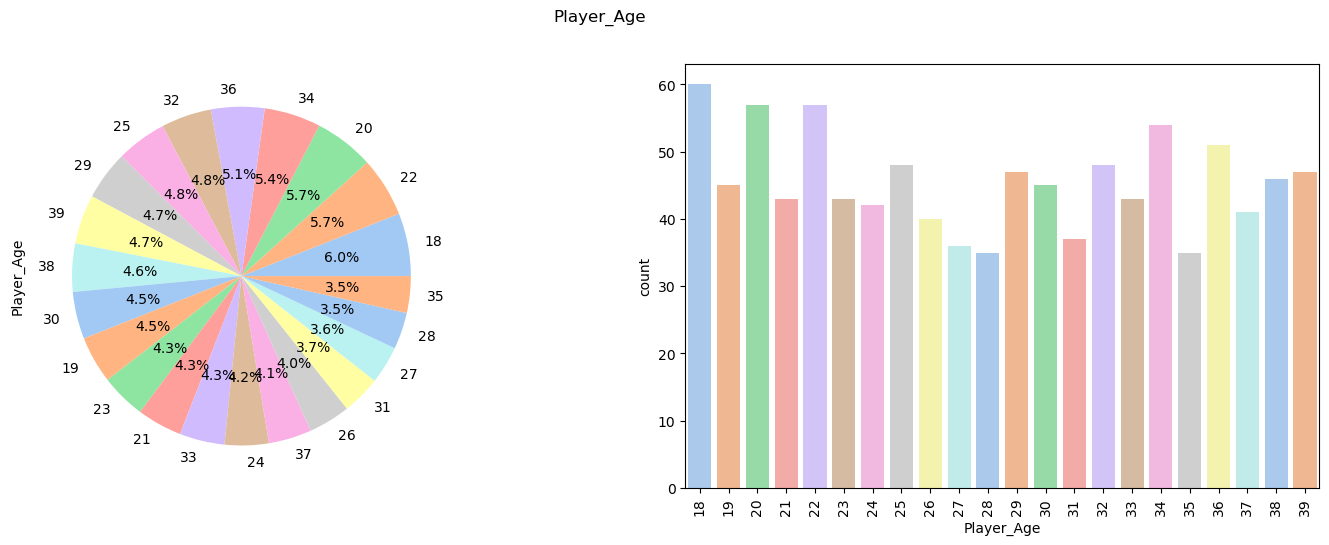

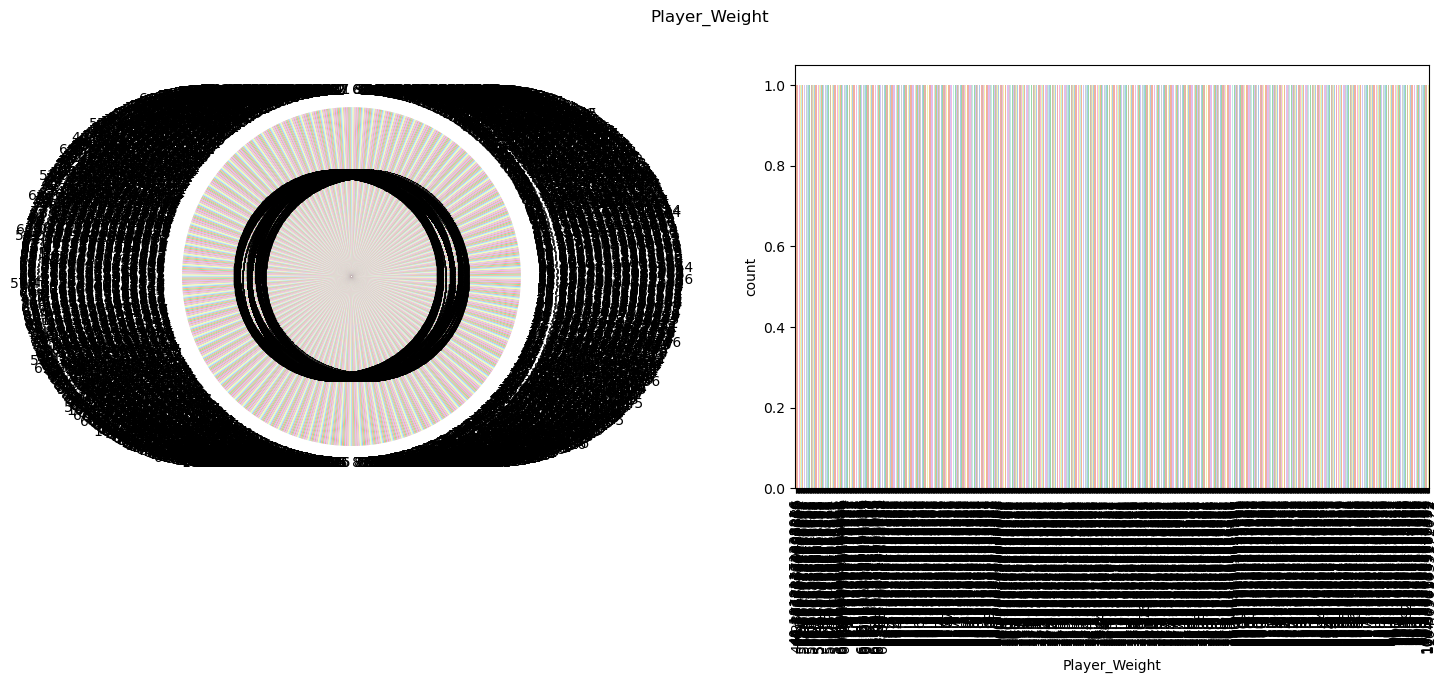

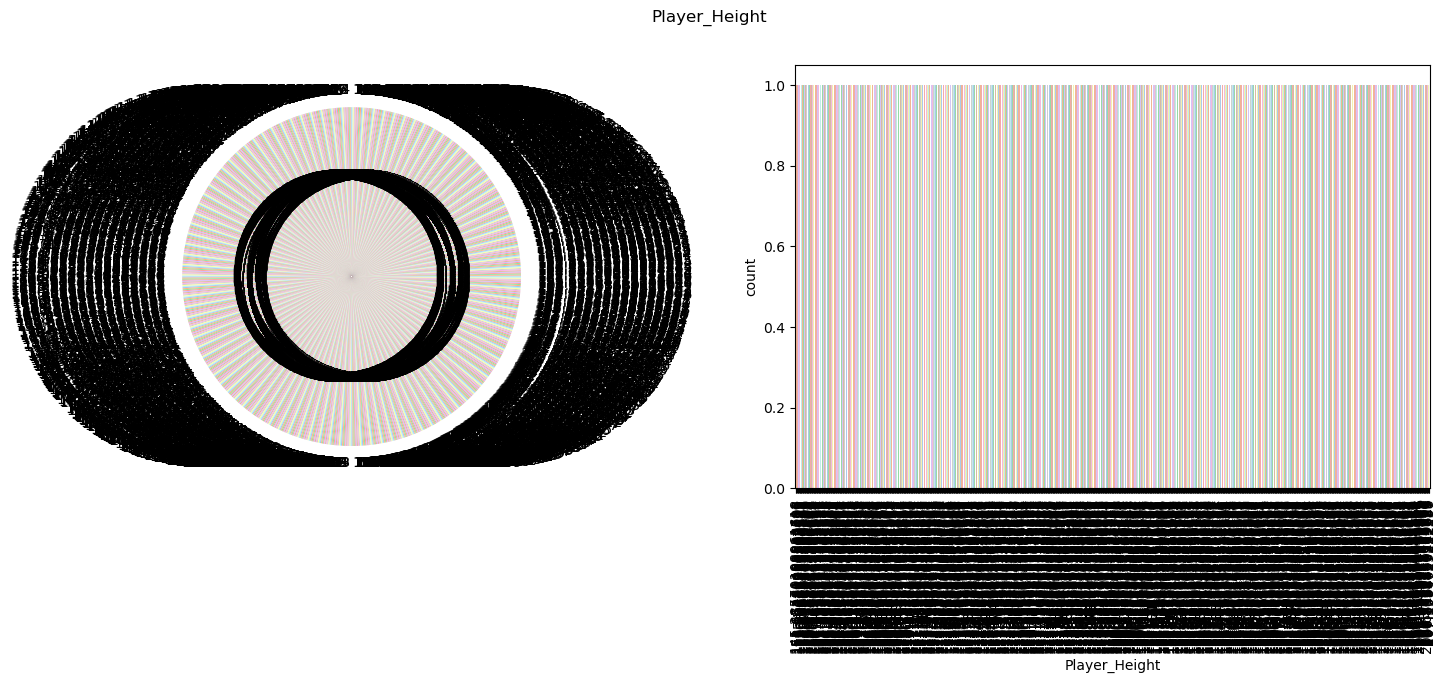

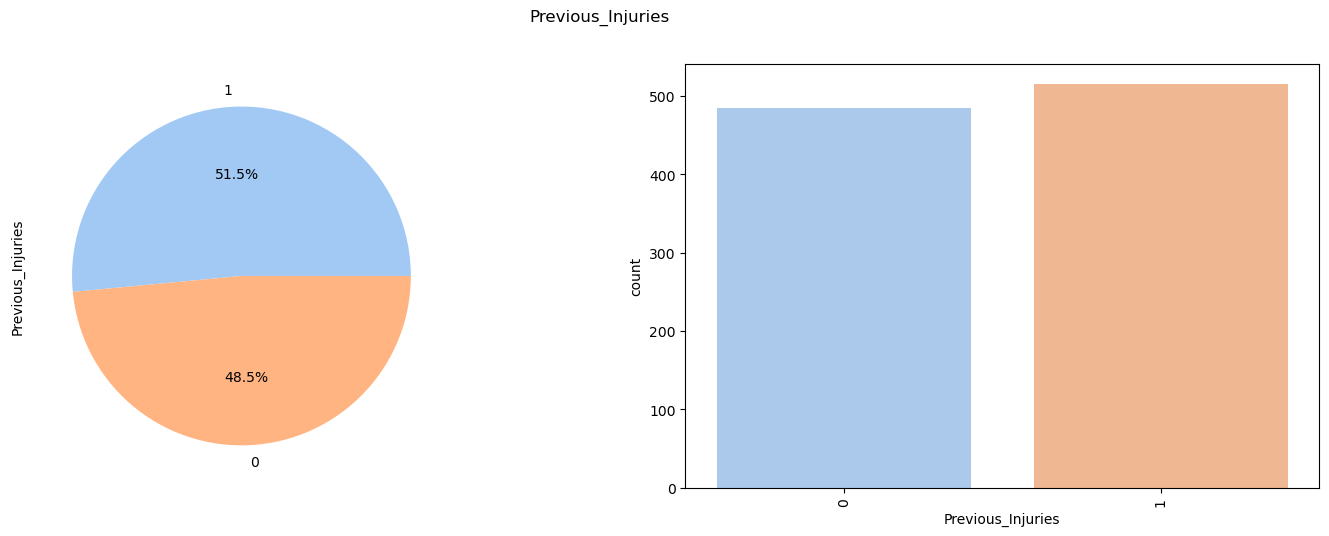

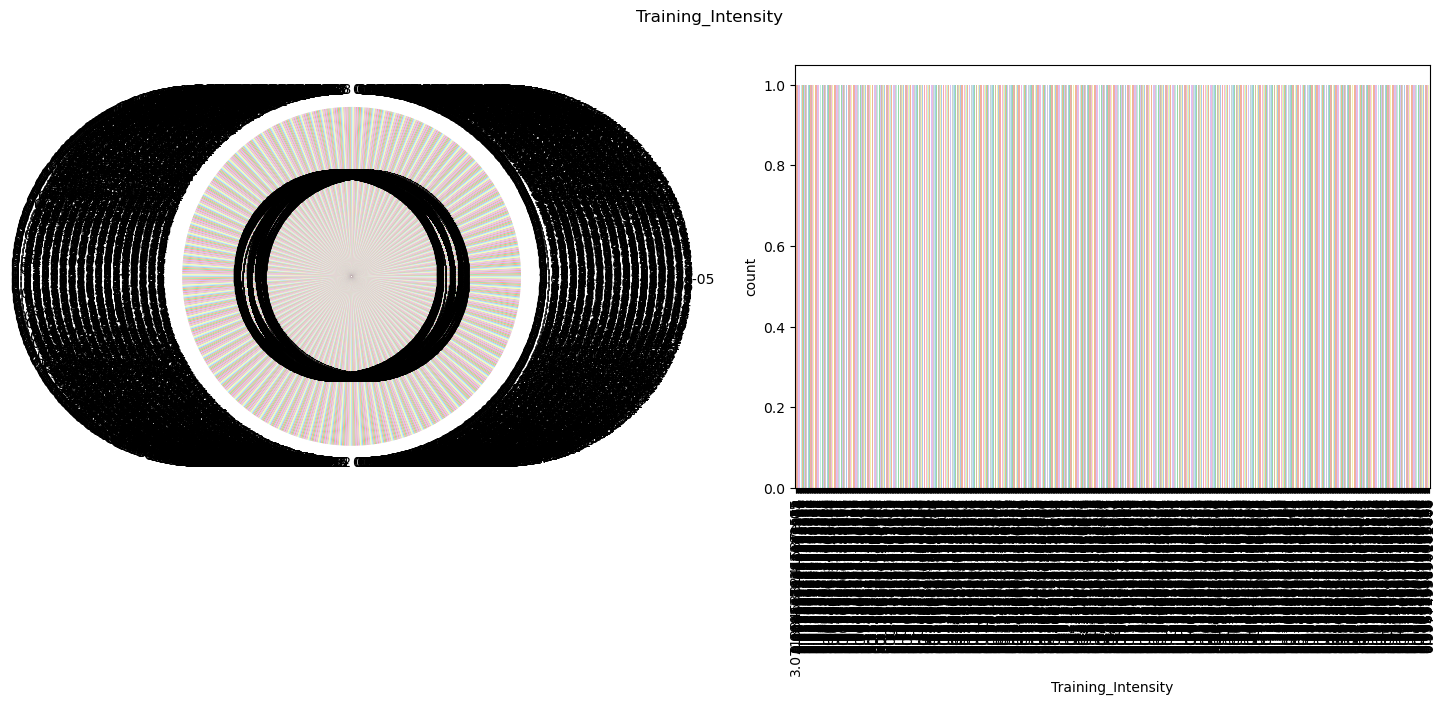

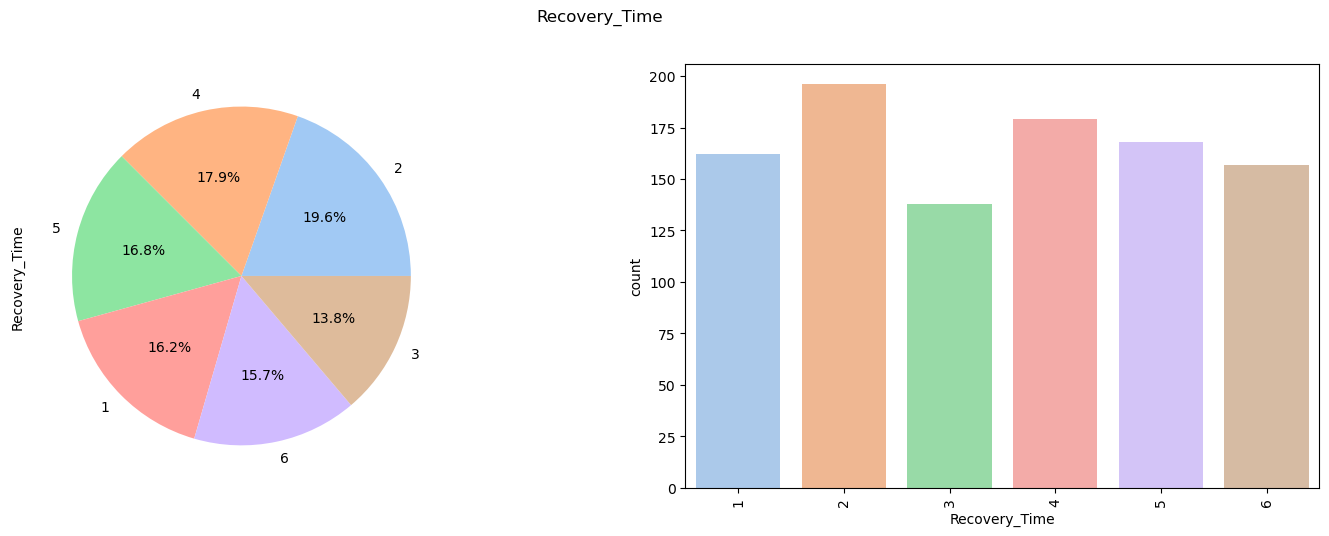

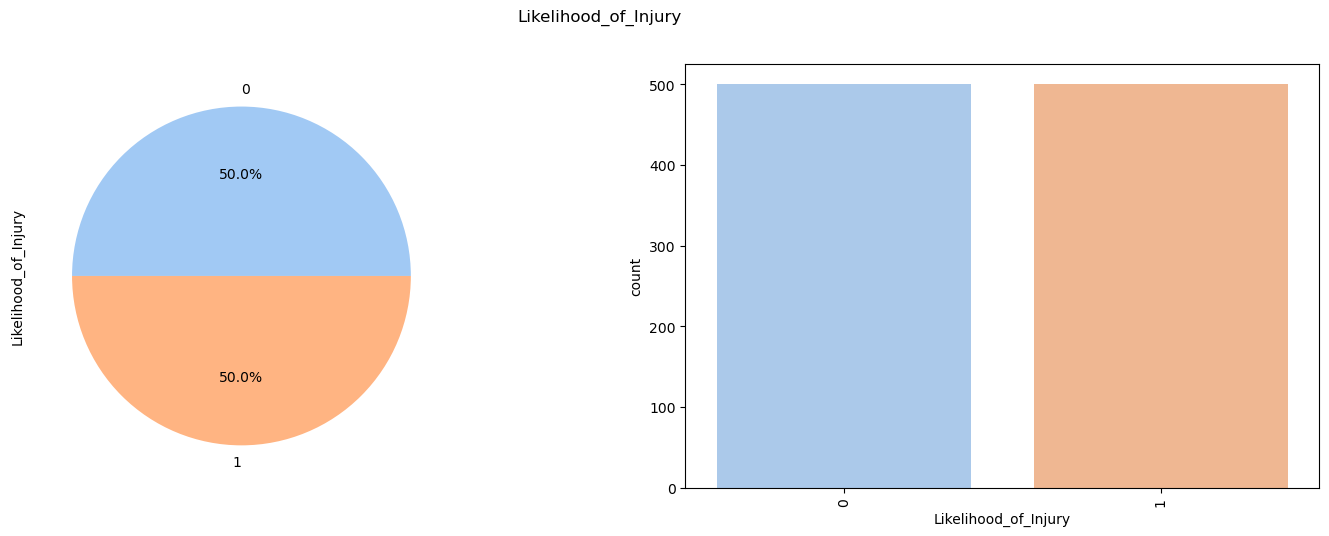

In [7]:
for column in df.columns:
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))
    
    # Pie chart
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=sns.color_palette("pastel"))
    ax[0].set_ylabel(f'{column}')
    
    # Count plot
    sns.countplot(x=column, data=df, ax=ax[1], palette='pastel')
    ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    
    plt.suptitle(f'{column}', color='black')  # Setting the title color to blue
    
    plt.show()

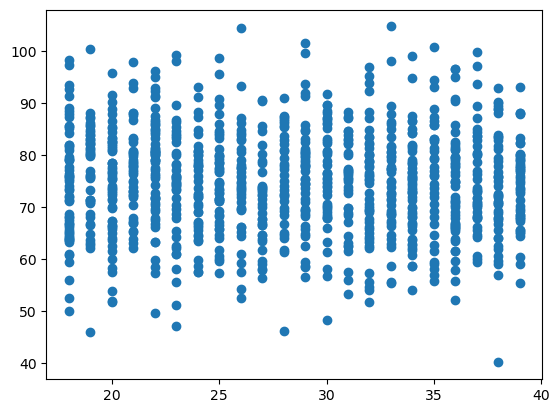

In [8]:
x=df['Player_Age']
y=df['Player_Weight']
plt.scatter(x,y)

<BarContainer object of 1000 artists>

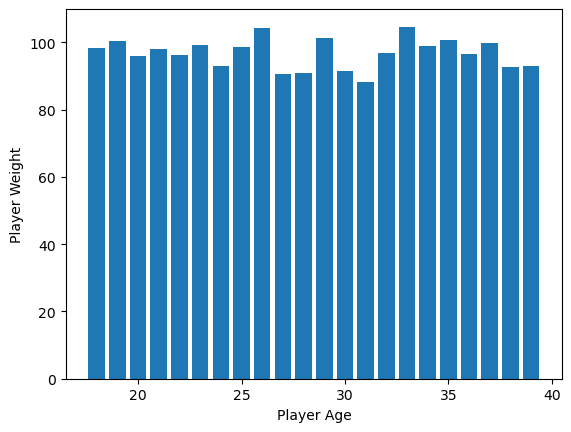

In [9]:
x=df['Player_Age']
y=df['Player_Weight']
plt.xlabel('Player Age')
plt.ylabel('Player Weight')
plt.bar(x,y)

In [10]:
x=df.iloc[:,0:6]
y=df.iloc[:,6]

In [11]:
x.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time
0,24,66.251933,175.732429,1,0.457929,5
1,37,70.996271,174.581650,0,0.226522,6
2,32,80.093781,186.329618,0,0.613970,2
3,28,87.473271,175.504240,1,0.252858,4
4,25,84.659220,190.175012,0,0.577632,1


In [12]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Likelihood_of_Injury, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(multi_class='ovr')
logit_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [17]:
yhat=logit_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test,yhat))

Accuracy:  0.546


In [21]:
#ALTERNATIVE WAY

In [22]:
y_pred_train=logit_model.predict(x_train)
y_pred_test=logit_model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
def model_report(model):
    model_name_pred_train=model.predict(x_train)
    model_name_pred_test=model.predict(x_test)
    print('Confusion Matric: ',confusion_matrix(y_train,model_name_pred_train))
    print('Confusion Matric: ',confusion_matrix(y_test,model_name_pred_test))
    print('Accuracy score: ',accuracy_score(y_train,model_name_pred_train))
    print('Accuracy score: ',accuracy_score(y_test,model_name_pred_test))
    print('classification_report: ',classification_report(y_train,model_name_pred_train))
    print('classification_report: ',classification_report(y_test,model_name_pred_test))

In [25]:
model_report(logit_model)

Confusion Matric:  [[116 128]
 [103 153]]
Confusion Matric:  [[122 134]
 [ 93 151]]
Accuracy score:  0.538
Accuracy score:  0.546
classification_report:                precision    recall  f1-score   support

           0       0.53      0.48      0.50       244
           1       0.54      0.60      0.57       256

    accuracy                           0.54       500
   macro avg       0.54      0.54      0.54       500
weighted avg       0.54      0.54      0.54       500

classification_report:                precision    recall  f1-score   support

           0       0.57      0.48      0.52       256
           1       0.53      0.62      0.57       244

    accuracy                           0.55       500
   macro avg       0.55      0.55      0.54       500
weighted avg       0.55      0.55      0.54       500



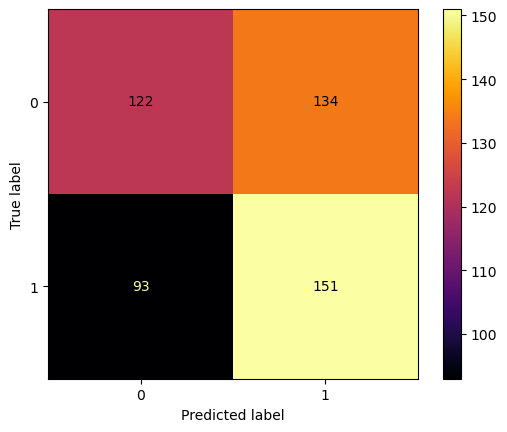

In [26]:
#PLOTTING CONFUSION MATRIX PLOT
from sklearn.metrics import ConfusionMatrixDisplay
cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
cm_display.plot(cmap=plt.cm.inferno)
plt.show()

In [27]:
#USING SUPPORT VENDOR MACHINE(SVM)

from sklearn import svm
clf2=svm.SVC(kernel='linear')
clf2.fit(x_train,y_train)
yhat2=clf2.predict(x_test)
print('Accuracy: ', accuracy_score(y_test,yhat2))

Accuracy:  0.536


In [28]:
#BUILDING A MODEL USING RANDOMFORESTCLASSIFIER

from sklearn.ensemble import RandomForestClassifier

In [29]:
#FITTING THE MODEL

model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

In [30]:
ypred = model.predict(x_test)

In [31]:
#CHECKING ACCURACY OF RANDOMFORESTCLASSIFIER

print("Accuracy: ", accuracy_score(y_test,ypred))

Accuracy:  0.532
